<a href="https://colab.research.google.com/github/ShaimaM/GooglePlayStoreApps/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Play Store Apps**  
####**Analysing the Android market**
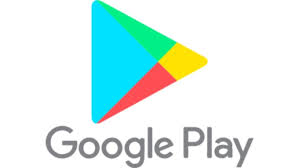

In [1]:
# import Packages
import math
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
#!pip install plotly==4.14.3
from google.colab import files
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set_palette("Set2")

In [3]:
# Code of downloading plots...

#plt.savefig("abc.png")
#files.download("abc.png")

In [2]:
# Reading the data
df=pd.read_csv('https://raw.githubusercontent.com/ShaimaM/Dataset/main/googleplaystore.csv')

#**Data Exploration**

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Displaying The total number of rows and features 
df.shape

(10841, 13)

In [6]:
# Displaying the details of numerical features
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# Displaying the data informations for each feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Data Preprocessing**

## **Data Issues:**
* Rows dublicate .
* outliers Values :
     *   '19.0' in Rating column .
     *   '1.9' in Category column .
* Filling the NaN values :
     *  'Rating' NaN values by 'Mean'.
     *  'Type' NaN values by most common value.
     *  'Content Rating' NaN values by most common value.
     *  'Current Ver' NaN values by most common value.
     *  'Android Ver' NaN values by most common value.
* Changing the datatype of 'Installs' column to Int and Replacing '+' in each value in the feature with ' ' .
* Changing the Datatype of 'Price' feature to Float Replacing '$' in each value in the feature with ' ' .
* Changing the datatype of 'Reviews' column to Int and Replacing 'M' with ' '.
* Changing the datatype of 'Android Ver' and 'Current Ver' .
     


       
      


**1- Handling Duplicated Records**


In [8]:
# Check for dublicate 
num_duplicate = df.duplicated(['App']).sum()
print("The data has {} records duplicated.".format(num_duplicate))

The data has 1181 records duplicated.


In [9]:
# Drop the duplicate 
df = df.drop(df.index[df.App.duplicated()], axis=0)

In [10]:
# Check for data shape after dropping duplicated records 
df.shape

(9660, 13)


**2- Handling Null Values**


In [11]:
# Show total number of null values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
# Filling the "Rating" null values by the mean 
df["Rating"].fillna(df["Rating"].mean(), inplace=True)

In [75]:
df.Type.value_counts()

0    8903
1     756
Name: Type, dtype: int64

In [13]:
# Filling the "Type" null values by 'Free' > most common value in this feature
df["Type"]=df["Type"].fillna(df['Type'].value_counts().index[0])

In [14]:
df["Content Rating"].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [15]:
# Filling the "Content Rating" null values by 'Everyone' > most common value in this feature
df["Content Rating"]=df["Content Rating"].fillna(df["Content Rating"].value_counts().index[0])

In [16]:
df['Current Ver'].value_counts()

Varies with device    1055
1.0                    799
1.1                    260
1.2                    176
2.0                    149
                      ... 
7.0.4                    1
2.1.1.4.0                1
3.1.16                   1
2018.5.25                1
9.3.1                    1
Name: Current Ver, Length: 2818, dtype: int64

In [17]:
# Filling the "Current Ver" null values by 'Varies with device' > most common value in this feature
df["Current Ver"]=df["Current Ver"].fillna(df['Current Ver'].value_counts().index[0])

In [18]:
df['Android Ver'].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1285
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 7.1.1              1
2.2 - 7.1.1              1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [19]:
# Filling the "Android Ver" null values by '4.1 and up' > most common value in this feature 
df["Android Ver"]=df["Android Ver"].fillna(df["Android Ver"].value_counts().index[0])

In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**3- Handling Outliers**

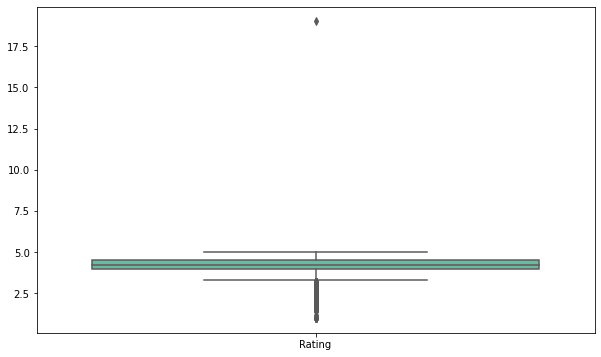

In [21]:
# Outliers , Rating > 17.5  
plt.figure(figsize=(10,6))
sns.boxplot(data=df);

In [22]:
# Check for the Outliers value in "Rating" feature
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


As showen thier is an outliers values in `Category`,`Rating` and `Type` . So I decied drop this row .

In [23]:
# Dropping the row which contiens an Outliers value 
df = df.drop(df.index[df.Rating>5], axis=0)

# **EDA**

In [24]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


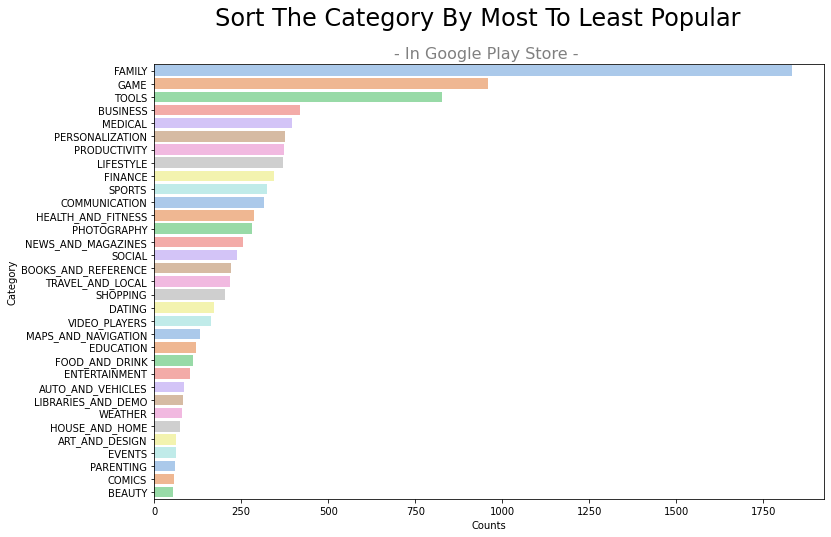

In [25]:
# Sort apps from the most popular to the least 
plt.figure(figsize = (12,8));
sns.barplot(df.Category.value_counts().values,df.Category.value_counts().index,palette="pastel")
plt.xlabel("Counts")
plt.ylabel("Category")
plt.suptitle('Sort The Category By Most To Least Popular', fontsize=24);
plt.title("- In Google Play Store - ",size=16,color = 'gray');
plt.show()

* As shown, the most popular `Category` in the apps store are family and games ,and the least popular are beauty apps

In [26]:
# range of rating of the most and least commons Category 
Category1 = df[df.Category=="GAME"].Rating
Category2 = df[df.Category=="FAMILY"].Rating
Category3 = df[df.Category=="BEAUTY"].Rating

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=Category1, name='GAME'))
fig.add_trace(go.Box(x=Category2, name='FAMILY'))
fig.add_trace(go.Box(x=Category3, name='BEAUTY'))

fig.update_layout(title={'text':'Range Rating Of Most And Least Popular Category','xanchor': 'center','yanchor': 'top','x':0.5},
                  yaxis=dict(title='Category'),xaxis=dict(title='Rating'))

fig.show()

* As shown, the range of `Rating` for Family and Games `category` between 1-5 , but Beauty `Rating`between 3.1 - 4.9 

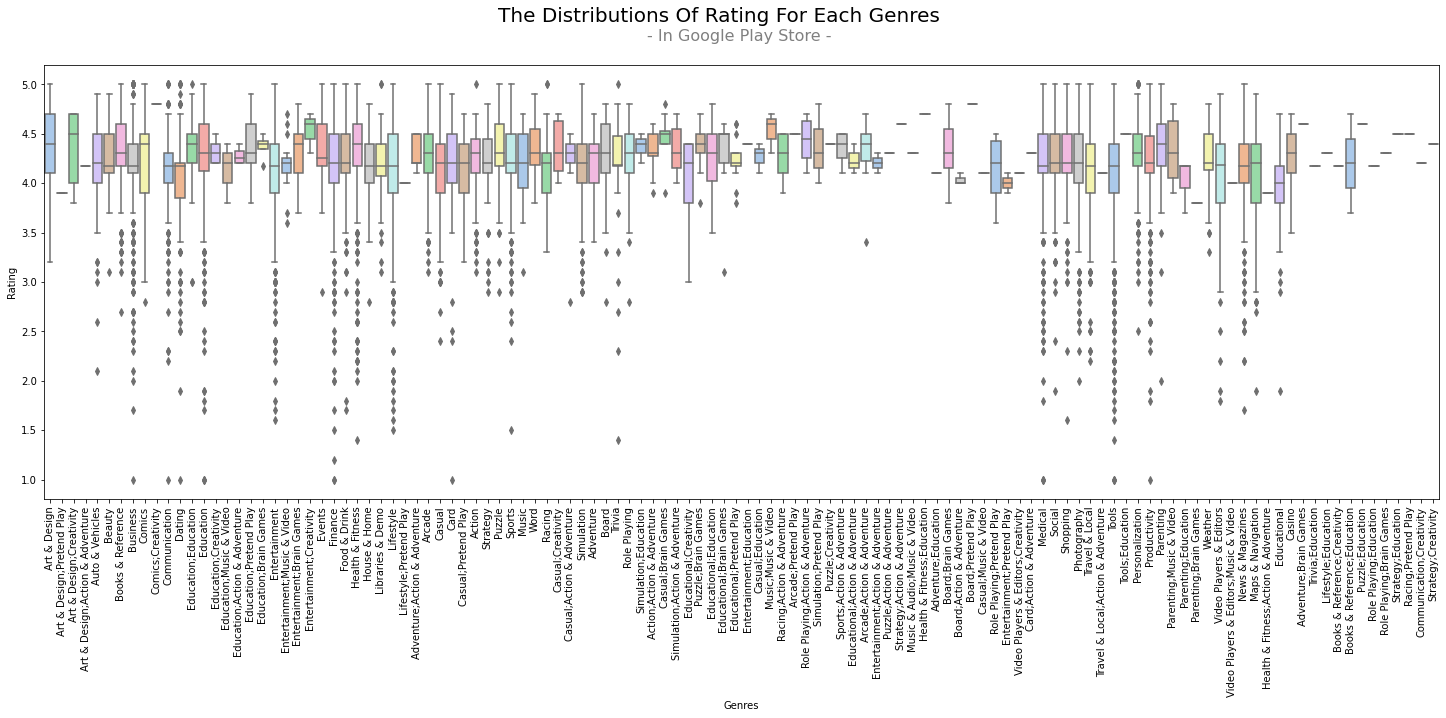

In [27]:
# Displaying the distrbution of rating feature for Genres by box plot
fig = go.Figure()
plt.figure(figsize= (25,8))
sns.boxplot(x="Genres", y="Rating", data=df,palette="pastel")
plt.xticks(rotation=90)
plt.suptitle("The Distributions Of Rating For Each Genres",size=20);
plt.title("- In Google Play Store - \n",size=16,color = 'gray');

* As it turns out, the `Raiting` changing slightly and greatly with according apps `Genres`


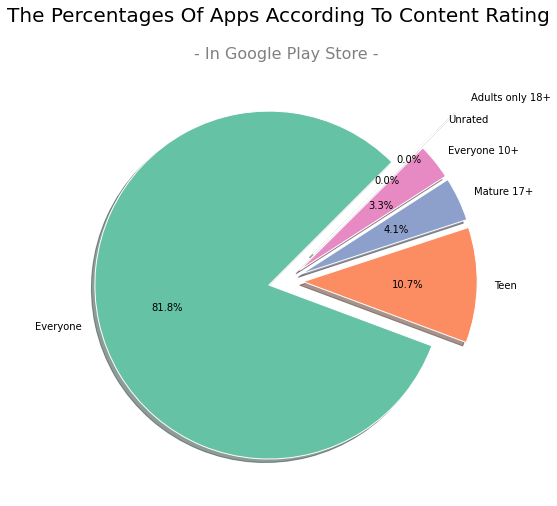

In [28]:
# PieChart for the apps based on content rating feature 
labels = df['Content Rating'].value_counts().index
values = df['Content Rating'].value_counts().values

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, explode=[0.1,0.1,0.1,0.1,0.4,0.22], autopct='%1.1f%%',startangle=45,
                      shadow =True,
wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.suptitle("The Percentages Of Apps According To Content Rating",size=20);
plt.title('- In Google Play Store -',color = 'gray',fontsize = 16)
plt.show()

* As is evident, almost all  the apps target "everyone", with a ratio of (81.8%) 

In [29]:
# plot of the Content Rating feature 
cont1 = df[df['Content Rating']=="Everyone"].Rating
cont2 = df[df['Content Rating']=="Teen"].Rating
cont5 = df[df['Content Rating']=="Mature 17+"].Rating
cont3 = df[df['Content Rating']=="Everyone 10+"].Rating
cont4 = df[df['Content Rating']=="Adults only 18+"].Rating
cont6 = df[df['Content Rating']=="Unrated"].Rating

fig = go.Figure()
# Use y instead of x argument for vertical plot
fig.add_trace(go.Box(y=cont1, name='Everyone'))
fig.add_trace(go.Box(y=cont2, name='Teen'))
fig.add_trace(go.Box(y=cont3, name='Mature 17+'))
fig.add_trace(go.Box(y=cont4, name='Everyone 10+'))
fig.add_trace(go.Box(y=cont5, name='Adults only 18+'))
fig.add_trace(go.Box(y=cont6, name='Unrated'))
fig.update_layout(title={'text':'Range Of Users Rating For Each Contant Rating','xanchor': 'center','yanchor': 'top','x':0.5},
                  yaxis=dict(title='Rating'),xaxis=dict(title='Content Rating'))


fig.show()

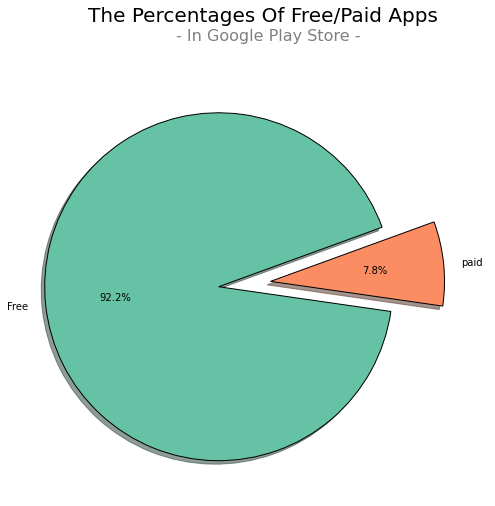

In [30]:
# Creating pie chart for Type feature
plt.figure(figsize=(8,8))
plt.pie(df.Type.value_counts(), explode=[0.3,0],labels=['Free', 'paid'] , autopct='%1.1f%%' ,
                      shadow =True,
                      startangle=20,
        wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.suptitle("The Percentages Of Free/Paid Apps",size=20);
plt.title("- In Google Play Store - \n",size=16,color = 'gray');

Most of application in this store are free , with a ratio of (92.2%).

In [31]:
# Converting Reviews feature to numeric
df["Reviews"] = pd.to_numeric(df["Reviews"])

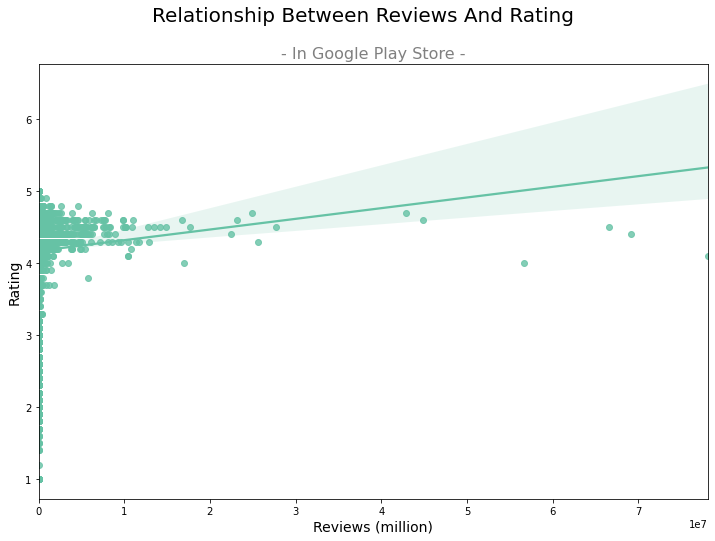

In [32]:
# Displaying Linear Regression between Rating and Reviews
plt.figure(figsize=(12,8))
sns.regplot(x="Reviews", y="Rating",data=df);
plt.title('Rating VS Reveiws',size = 20)
plt.xlabel("Reviews (million)", fontsize = 14)
plt.ylabel("Rating", fontsize = 14)
plt.suptitle("Relationship Between Reviews And Rating",size=20);
plt.title('- In Google Play Store -',color = 'gray',fontsize = 16)
plt.show()

Most of the apps in the store seem to have less than a 1 million `Reviews`

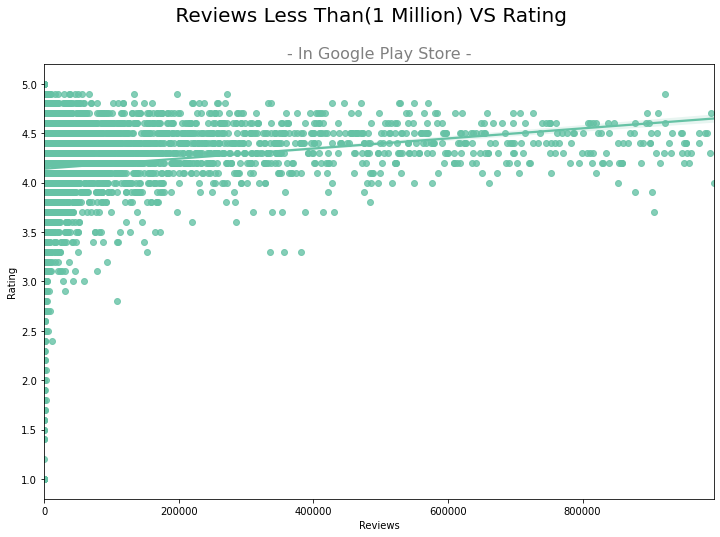

In [33]:
# Displaying Linear Regression between Rating and Reviews<1000000
plt.figure(figsize = (12,8))
sns.regplot(x="Reviews", y="Rating",data=df[df['Reviews']<1000000]);
plt.suptitle(" Reviews Less Than(1 Million) VS Rating",size=20);
plt.title('- In Google Play Store -',color = 'gray',fontsize = 16);

As can be seen, the relationship is positive between the `Reviews` and the `Ratings` of apps

In [34]:
# Removing the "+" symbol to make the column numeric.
df["Installs"]=df["Installs"].map(lambda x: x.rstrip('+'))
# Removing the "," from the digits to make it easier.
df["Installs"]=df["Installs"].str.replace(",","")

In [35]:
# Converting the Datatype to the numeric type for analysis
df["Installs"]=pd.to_numeric(df["Installs"])

In [36]:
Sorted_value = sorted(list(df['Installs'].unique()))

In [37]:
df['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

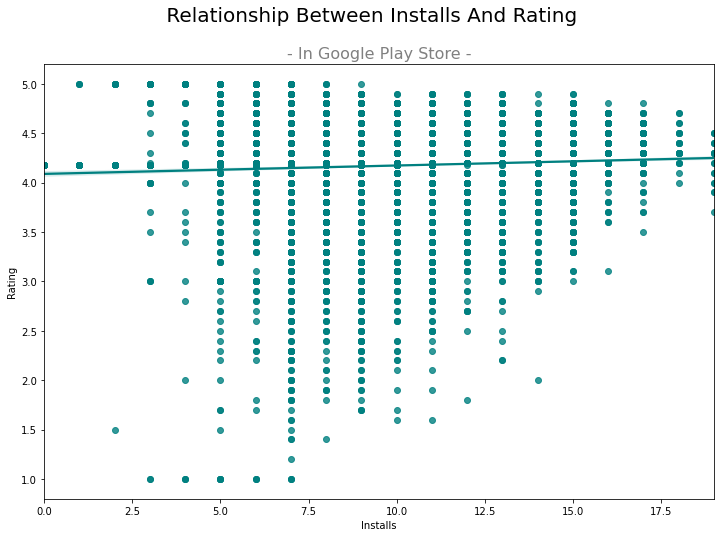

In [38]:
plt.figure(figsize = (12,8))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=df);
plt.suptitle(" Relationship Between Installs And Rating",size=20);
plt.title('- In Google Play Store -',color = 'gray',fontsize = 16);

* Seem like number of `Installs` affect to `Rating` of the app

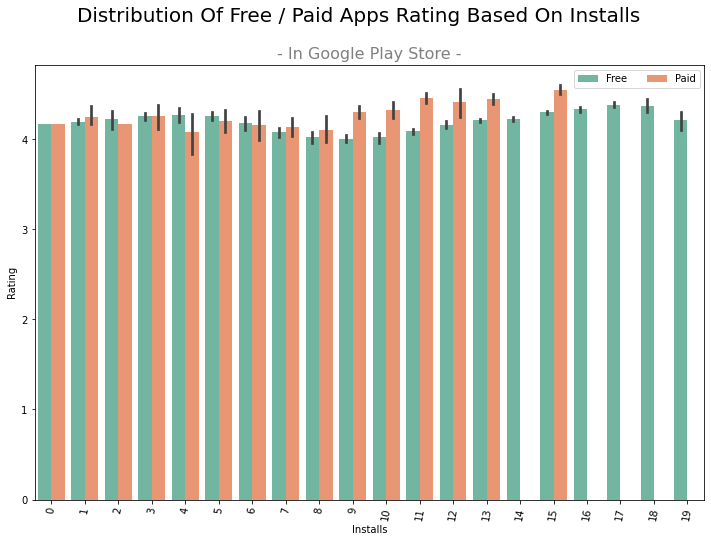

In [39]:
# Displaying the distribution of apps types based on Rating and Installs feature
plt.figure(figsize=(12,8))
sns.barplot(x=df['Installs'],y=df.Rating,hue=df.Type)
plt.xticks(rotation=80);
plt.legend(loc="upper center", bbox_to_anchor=(0.9, 1.0), ncol=2);
plt.suptitle("Distribution Of Free / Paid Apps Rating Based On Installs",size=20);
plt.title('- In Google Play Store -',color = 'gray',fontsize = 16)
plt.show();

* As shown, users are tend to vote higher when they pay for it.

In [40]:
# Spliting Rating feature values

rate_1 = df.loc[df.Rating < 0.5].Rating.count()
rate_2 = df.loc[((df.Rating >= 0.5)&(df.Rating < 1))].Rating.count()
rate_3 = df.loc[((df.Rating >= 1)&(df.Rating < 1.5))].Rating.count()
rate_4 = df.loc[((df.Rating >= 1.5)&(df.Rating < 2))].Rating.count()
rate_5 = df.loc[((df.Rating >= 2)&(df.Rating < 2.5))].Rating.count()
rate_6 = df.loc[((df.Rating >= 2.5)&(df.Rating < 3))].Rating.count()
rate_7 = df.loc[((df.Rating >= 3)&(df.Rating < 3.5))].Rating.count()
rate_8 = df.loc[((df.Rating >= 3.5)&(df.Rating < 4))].Rating.count()
rate_9 = df.loc[((df.Rating >= 4)&(df.Rating < 4.5))].Rating.count()
rate_10 = df.loc[((df.Rating >= 4.5)&(df.Rating < 5))].Rating.count()

In [41]:
Ratting_app = pd.DataFrame()
Ratting_app['labels'] = [ '0.5','1', '1.5','2','2.5','3','3.5','4','4.5','5']
Ratting_app['values'] = [ rate_1 ,rate_2  , rate_3 , rate_4, rate_5,rate_6, rate_7, rate_8, rate_9, rate_10]

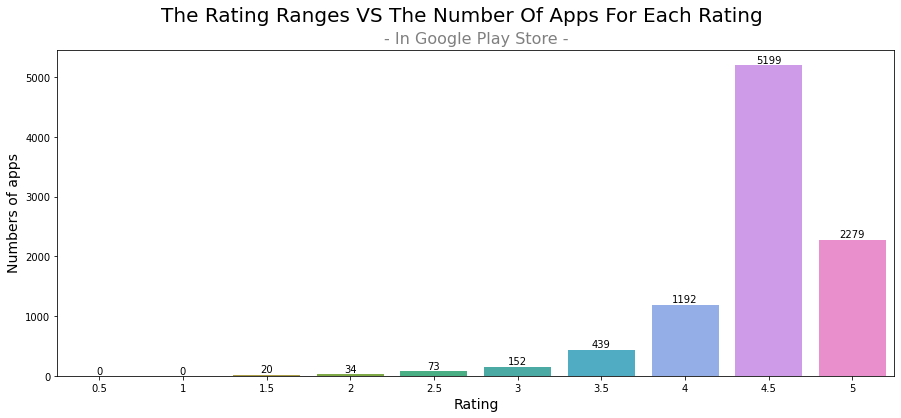

In [42]:
# Barplot shows the number of apps for each Rating
plt.figure(figsize=(15, 6))
splot=sns.barplot(x="labels",y="values",data=Ratting_app)
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Rating", size=14)
plt.ylabel("Numbers of apps", size=14)
plt.suptitle("The Rating Ranges VS The Number Of Apps For Each Rating",size=20);
plt.title('- In Google Play Store -',color = 'gray',fontsize = 16);

* As shown, the most frequntly value to rating the apps is 4.5 

# **Data Encoding**

In [43]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,9,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,12,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,14,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,16,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,11,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [44]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [45]:
# featurs value encoding

le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])
df['Category'] = le.fit_transform(df['Category'])
df['Size'] = le.fit_transform(df['Size'])
df['Type'] = le.fit_transform(df['Type'])
df['Price'] = df['Price'].apply(lambda x : x.strip('$')) # Price cleaning
df['Price'] = le.fit_transform(df['Price'])
df['Content Rating'] = le.fit_transform(df['Content Rating'])
df['Genres'] = le.fit_transform(df['Genres'])
df['Current Ver'] = le.fit_transform(df['Current Ver'])
df['Android Ver'] = le.fit_transform(df['Android Ver'])

In [46]:
# Displaing data corrlation
corr = df.corr()
corr.style.background_gradient(cmap='BuPu')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
App,1.000000,0.023569,0.027092,0.027349,0.075930,0.188195,0.017495,0.014194,0.052981,0.028331,0.067020,0.080289
Category,0.023569,1.000000,-0.037519,0.017300,-0.003027,0.058650,0.016994,-0.002079,-0.093876,0.796488,0.091722,0.090532
Rating,0.027092,-0.037519,1.000000,0.054946,0.055593,0.065524,0.040729,0.021567,0.025846,-0.043818,0.030738,0.057388
Reviews,0.027349,0.017300,0.054946,1.000000,0.122390,0.207592,-0.033078,-0.025391,0.055621,0.006707,0.102401,0.103930
Size,0.075930,-0.003027,0.055593,0.122390,1.000000,0.297312,-0.026372,-0.005665,0.057485,0.006087,0.377398,0.433371
Installs,0.188195,0.058650,0.065524,0.207592,0.297312,1.000000,-0.234163,-0.160977,0.120915,0.043562,0.387119,0.233404
Type,0.017495,0.016994,0.040729,-0.033078,-0.026372,-0.234163,1.000000,0.782659,-0.041935,-0.002299,-0.056608,-0.092664
Price,0.014194,-0.002079,0.021567,-0.025391,-0.005665,-0.160977,0.782659,1.000000,-0.025715,-0.006198,-0.016632,-0.065651
Content Rating,0.052981,-0.093876,0.025846,0.055621,0.057485,0.120915,-0.041935,-0.025715,1.000000,-0.130371,0.005826,-0.004092
Genres,0.028331,0.796488,-0.043818,0.006707,0.006087,0.043562,-0.002299,-0.006198,-0.130371,1.000000,0.091220,0.097516


# **Split Data**

In [47]:
features = ['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver']

x = df[features]
y = df['Rating']

# Splitting into train and test sets for both parameters
x_train, x_test ,y_train , y_test = train_test_split(x,y, test_size=0.7, random_state= 42)

# **Build Machine Learning Models**

###**Linear Regression**

In [48]:
# Create linear regression object
lr = LinearRegression()

In [49]:
# fit training set into LinearRegression model 
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# prediction of x_test
preds = lr.predict(x_test)
preds

array([4.17085036, 4.11225633, 4.28597547, ..., 4.16196484, 4.12592946,
       4.1803118 ])

In [51]:
# print score for LinearRgrission
print("Linear Regression Score is :",(r2_score(y_true =y_test, y_pred=preds)*100))

Linear Regression Score is : 0.9308459867664154


In [52]:
# print mean absolute error 
print("Mean Absolute Error is :",(mean_absolute_error(y_true =y_test, y_pred=preds )))

Mean Absolute Error is : 0.3281119689982722


In [53]:
# print mean squared error 
print("Mean Sequared Error is :",(mean_squared_error(y_true =y_test, y_pred=preds )))

Mean Sequared Error is : 0.24078870511449477


In [54]:
# print root mean squared error 
MSE = np.square(np.subtract(y_test,preds).mean())
RMSE = math.sqrt(MSE)
print("\nRoot Mean Sequared Error is :",(math.sqrt(MSE)))


Root Mean Sequared Error is : 0.010828864698775833


###**GridSearchCV**


In [55]:
# import GridSearchCV
p_grid = {'fit_intercept': [True, False],
          'normalize': [True, False],
          'copy_X':[True, False]
          }

grid = GridSearchCV(lr, p_grid)

In [56]:
# fit training set into GridSearchCV model 
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
# print the best parameters
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

###**Linear Regression** after **GridSearchCV**

In [58]:
# LinearRegression with best parameters
lr = LinearRegression(fit_intercept=True,
                      normalize=False,
                      copy_X=True)

In [59]:
# refit training set into LinearRegression model 
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# prediction of x_test
preds = lr.predict(x_test)
preds

array([4.17085036, 4.11225633, 4.28597547, ..., 4.16196484, 4.12592946,
       4.1803118 ])

In [61]:
# print score for LinearRgrission after GridSearchCV
print("Linear Regression Score after GridSearchCV is :",(r2_score(y_test, lr.predict(x_test))*100))
# print mean absolute error for LinearRgrission after GridSearchCV
print("\nMean Absolute Error after GridSearchCV is :",(mean_absolute_error(y_true =y_test, y_pred=preds )*100))
# print mean squared error for LinearRgrission after GridSearchCV
print("\nMean Sequared Error after GridSearchCV is :",(mean_squared_error(y_true =y_test, y_pred=preds )*100))
# print root mean squared error for LinearRgrission after GridSearchCV
MSE = np.square(np.subtract(y_test,preds).mean())
RMSE = math.sqrt(MSE)
print("\nRoot Mean Sequared Error after GridSearchCV is :",(math.sqrt(MSE)*100))

Linear Regression Score after GridSearchCV is : 0.9308459867664154

Mean Absolute Error after GridSearchCV is : 32.81119689982722

Mean Sequared Error after GridSearchCV is : 24.078870511449477

Root Mean Sequared Error after GridSearchCV is : 1.0828864698775833


 **The model results are unchanged from the previous one**

 **The best possible R2 score is 0.93 .**

###**Baseline**

In [71]:
def baseline_model(n_predictions, value_to_predict):
   
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

# how many predictions to make?
n_predictions = len(y_test) 
# what value to predict?
baseline_value = np.max(y_train)  

baseline_model(n_predictions, baseline_value)

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
6757    5.0
6758    5.0
6759    5.0
6760    5.0
6761    5.0
Length: 6762, dtype: float64

In [74]:
baseline_preds = baseline_model(n_predictions, baseline_value)

# score baseline model
print("Mean Absolute Error after GridSearchCV is :",(mean_absolute_error(y_test, baseline_preds)*100))

Mean Absolute Error after GridSearchCV is : 82.30030612262934


**Tha result of MAE increased from `32,8` to `82.3`.**

**ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ**